# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID: Task2G3M 14
- Names:  Jorge Leonardo Lemus Castiblanco, Sneha Tuladhar, William Hebblewhite
- Student IDs:  229517836; 219506801; 220597584
- Emails:  Whebblewhite@deakin.edu.au; stuladhar@deakin.edu.au; jlemuscastiblan@deakin.edu.au
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from ipywidgets import IntProgress
import pandas as pd
import numpy as np
from IPython.display import display
from zipfile import ZipFile

all_files = ZipFile('/content/drive/MyDrive/SIT742/HTWebLog_p1.zip', 'r')
files = all_files.namelist()
data = pd.DataFrame()
weblog_df = pd.DataFrame()
# Define the column names
ColumnNames=['date','time','s_sitename','s_ip','cs_method','cs_uri_stem','cs_uri_query','s_port','cs_username',
             'c_ip','cs(User_Agent)','cs(Referer)','sc_status','sc_substatus','sc_win32_status']
for filenames in files:
    web_log = pd.read_csv(all_files.open(filenames), header=0, sep="\s+", skiprows=3, names=ColumnNames, index_col=False, encoding="iso-8859-1")
    data = data.append(web_log)
weblog_df = pd.concat([weblog_df, data])

In [ ]:
#########################################
## Check first five rows of the DataFrame
weblog_df.head()

## Check the dimensionality of the DataFrame
print(weblog_df.shape)

## Generate descriptive statistics of DataFrame
print(weblog_df.describe())

## Check for duplicate rows
weblog_df.duplicated()



(8438976, 15)
              date      time  ... sc_substatus sc_win32_status
count      8438976   8438976  ...      8438940         8438940
unique         125     86386  ...            8              26
top     2006-12-12  08:37:00  ...            0               0
freq        120190       382  ...      8171249         7802748

[4 rows x 15 columns]


0        False
1        False
2        False
3        False
4        False
         ...  
63741    False
63742    False
63743    False
63744    False
63745    False
Length: 8438976, dtype: bool

In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [ ]:
####################################################################
## Changing all '-' to NaN for ease of cleaning. 
weblog_df = weblog_df.replace("-", np.nan) # Replaces all dashes in Dataframe with NaN
print("\nCheck NaN values in DataFrame", weblog_df.isnull(), sep='\n')
print("\ncheck NaN values in columns", weblog_df.isnull().sum(), sep='\n')
print("\n***NaN values in each Row", weblog_df.shape[0])
print(weblog_df)



Check NaN values in DataFrame
        date   time  s_sitename  ...  sc_status  sc_substatus  sc_win32_status
0      False  False       False  ...      False         False            False
1      False  False       False  ...      False         False            False
2      False  False       False  ...      False         False            False
3      False  False       False  ...      False         False            False
4      False  False       False  ...      False         False            False
...      ...    ...         ...  ...        ...           ...              ...
63741  False  False       False  ...      False         False            False
63742  False  False       False  ...      False         False            False
63743  False  False       False  ...      False         False            False
63744  False  False       False  ...      False         False            False
63745  False  False       False  ...      False         False            False

[8438976 rows x 15 c

In [ ]:
##################################################
for column in weblog_df.columns.values.tolist():
  print(column)
  print (weblog_df[column].value_counts())
  print('')
  #################################################

date
2006-12-12    120190
2006-11-27    120019
2006-12-14    118609
2006-12-13    117075
2006-12-08    113063
               ...  
#Software:        12
#Version:         12
#Date:            12
#Fields:          12
2007-03-01         1
Name: date, Length: 125, dtype: int64

time
08:37:00    382
09:55:14    375
09:13:05    358
04:41:05    349
06:30:22    343
           ... 
23:07:56      1
23:15:08      1
19:51:33      1
20:30:50      1
20:47:05      1
Name: time, Length: 86386, dtype: int64

s_sitename
W3SVC1      8438928
time             12
Internet         12
12:18:13          1
14:59:02          1
19:11:29          1
23:01:48          1
10:43:56          1
15:27:52          1
23:00:00          1
20:26:44          1
22:47:17          1
04:19:47          1
19:09:59          1
19:10:23          1
Name: s_sitename, dtype: int64

s_ip
127.0.0.1      8438928
s-sitename          12
Information         12
Name: s_ip, dtype: int64

cs_method
GET         8421984
POST           9509
HEAD      

In [ ]:
######################
weblog_df[weblog_df.values  =='#Fields:']
##################################

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
9887,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
79233,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
52690,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
89275,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
76422,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
40996,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
41233,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
113313,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
51445,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus
45041,#Fields:,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus


In [ ]:
###################################################
#Deleting some rows by ´hand´ 
weblog_df= weblog_df.drop([9887],axis=0) # Delete all rows with label "#Fields:"
#####################################################

In [ ]:
weblog_df.shape

(8438856, 15)

In [ ]:
weblog_df = weblog_df.drop(columns=['cs_uri_query', 'cs_username', 'cs(Referer)'], axis=1) #Dropping colums with greater than 15% NaN

#remove any rows with missing values
weblog_df.dropna( axis=0 , how = 'any',inplace = True)
print('Drop any rows with mising value\n')
print(weblog_df.isnull().sum())

Drop any rows with mising value

date               0
time               0
s_sitename         0
s_ip               0
cs_method          0
cs_uri_stem        0
s_port             0
c_ip               0
cs(User_Agent)     0
sc_status          0
sc_substatus       0
sc_win32_status    0
dtype: int64


In [ ]:
# only 30% of total data are selected for classification
weblog_df_sample = weblog_df.sample(frac = 0.3, random_state=1)

print("\nData size :",weblog_df_sample.shape)
print("\nNumber of records :",len(weblog_df_sample))
print("\nNumber of attributes :",len(weblog_df_sample.columns))
print('--------------------------------------')




Data size : (2530588, 12)

Number of records : 2530588

Number of attributes : 12
--------------------------------------


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [ ]:
ml_df = weblog_df[['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)', 'sc_status']]

ml_df.describe()

,cs_method,c_ip,cs_uri_stem,cs(User_Agent),sc_status
count,8435293,8435293,8435293,8435293,8435293
unique,7,74337,4688,4959,24
top,GET,59.188.33.66,/Tulip/common/common_style.aspx,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
freq,8418557,93752,402930,1982216,5889393


In [ ]:
ml_df.head()

,cs_method,c_ip,cs_uri_stem,cs(User_Agent),sc_status
0,GET,70.80.84.76,/Default.aspx,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
1,GET,70.80.84.76,/Tulip/home/en-us/home_index.aspx,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2,GET,70.80.84.76,/Tulip/includes/js/CommonUtil.js,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
3,GET,70.80.84.76,/Tulip/common/common_style.aspx,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
4,GET,70.80.84.76,/Tulip/common/en-us/images/top_img.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Instantiate LabelEncoder
le = LabelEncoder()

le_df = ml_df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

 
wcss = []
for i in range(2, 10):
 kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 kmeans.fit(le_df)
 wcss.append(kmeans.inertia_)

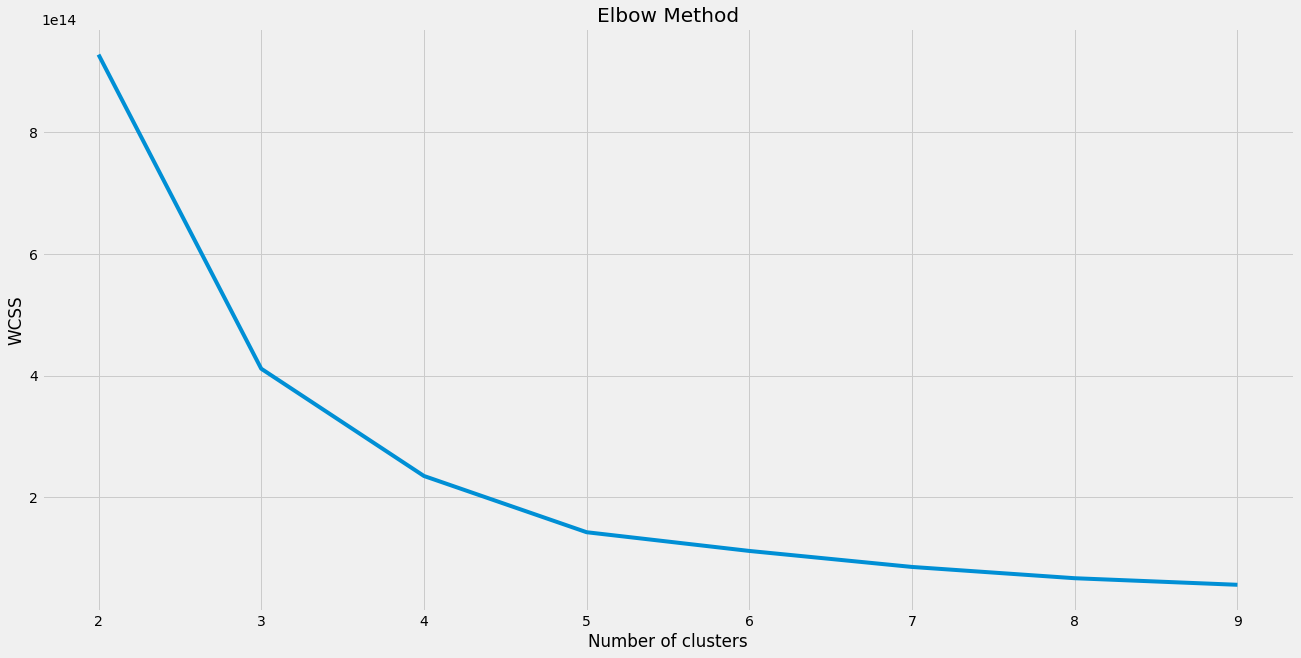

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

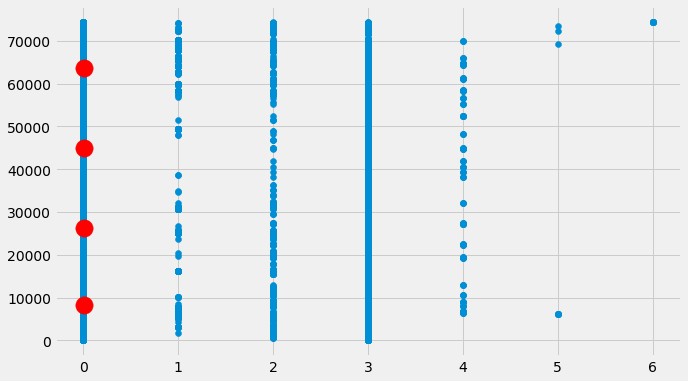

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, 

n_init=10, random_state=0) 

pred_y = kmeans.fit_predict(le_df)

plt.scatter(le_df.iloc[:,0], le_df.iloc[:,1]) 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.show()

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [ ]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext 
from pyspark.sql import SQLContext
from pyspark import SparkConf
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("cs_method", IntegerType(), True),
                    StructField("c_ip", IntegerType(), True),
                    StructField("cs_uri_stem", IntegerType(), True),
                    StructField("cs(User_Agent)", IntegerType(), True),
                    StructField("sc_status", IntegerType(), True)])

print(schema)

StructType(List(StructField(cs_method,IntegerType,true),StructField(c_ip,IntegerType,true),StructField(cs_uri_stem,IntegerType,true),StructField(cs(User_Agent),IntegerType,true),StructField(sc_status,IntegerType,true)))


In [ ]:
sl_df = spark.createDataFrame(le_df, schema)
sl_df.show()

+---------+-----+-----------+--------------+---------+
|cs_method| c_ip|cs_uri_stem|cs(User_Agent)|sc_status|
+---------+-----+-----------+--------------+---------+
|        0|69634|         13|          1478|        0|
|        0|69634|       3313|          1478|        0|
|        0|69634|       3365|          1478|        0|
|        0|69634|       2684|          1478|        0|
|        0|69634|       2745|          1478|        0|
|        0|69634|       2746|          1478|        0|
|        0|69634|       2750|          1478|        0|
|        0|69634|       2747|          1478|        0|
|        0|69634|       2749|          1478|        0|
|        0|69634|       2775|          1478|        0|
|        0|69634|       2751|          1478|        0|
|        0|69634|       2752|          1478|        0|
|        0|69634|       2719|          1478|        0|
|        0|69634|       2733|          1478|        0|
|        0|69634|       2721|          1478|        0|
|        0

In [ ]:
sl_df.printSchema()

root
 |-- cs_method: integer (nullable = true)
 |-- c_ip: integer (nullable = true)
 |-- cs_uri_stem: integer (nullable = true)
 |-- cs(User_Agent): integer (nullable = true)
 |-- sc_status: integer (nullable = true)



In [ ]:
#Only 10% of the data is used in this part.
sl_df_sample = sl_df.sample(fraction=0.1, seed=1)

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df_sample)
df_temp.show(3)

+---------+-----+-----------+--------------+---------+--------------------+
|cs_method| c_ip|cs_uri_stem|cs(User_Agent)|sc_status|            features|
+---------+-----+-----------+--------------+---------+--------------------+
|        0|69634|       2684|          1478|        0|[0.0,69634.0,2684...|
|        0|69634|       2727|          1478|        0|[0.0,69634.0,2727...|
|        0|69634|       2731|          1478|        0|[0.0,69634.0,2731...|
+---------+-----+-----------+--------------+---------+--------------------+
only showing top 3 rows



In [ ]:
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
df_sl.show(5)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[0.0,69634.0,2684...|
|        0|[0.0,69634.0,2727...|
|        0|[0.0,69634.0,2731...|
|        0|[0.0,69634.0,2464...|
|        0|[0.0,48795.0,2721...|
+---------+--------------------+
only showing top 5 rows



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
from pyspark.ml import Pipeline
import time
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
(TrainingData, TestingData) = df_sl.randomSplit([0.7, 0.3])

In [ ]:
print("TrainingData size is {}".format(TrainingData.count()))

print("TestingData size is {}".format(TestingData.count()))

TrainingData size is 591180
TestingData size is 253498


In [ ]:
TrainingData.groupby('sc_status').agg({'sc_status': 'count'}).show() # Shows us how the count of different datums for the label (sc_status)

+---------+----------------+
|sc_status|count(sc_status)|
+---------+----------------+
|       12|               2|
|        1|            5049|
|        6|              44|
|        3|             501|
|        5|               9|
|        9|               1|
|        4|          149521|
|        8|               1|
|        7|           10141|
|       10|             143|
|       11|               8|
|        2|              41|
|        0|          425719|
+---------+----------------+



In [ ]:
start = time.time()
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'sc_status', maxDepth = 3)
dtModel = dt.fit(TrainingData)
predictions = dtModel.transform(TestingData)
predictions.select('sc_status', 'features', 'rawPrediction', 'prediction').show(10)
finish = round(time.time()-start)
print(f"The process took {finish} seconds to complete")

+---------+--------------------+--------------------+----------+
|sc_status|            features|       rawPrediction|prediction|
+---------+--------------------+--------------------+----------+
|        0|[0.0,0.0,2684.0,1...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,0.0,2708.0,1...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,1.0,2729.0,1...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,3.0,2746.0,9...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,3.0,2751.0,9...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,3.0,2763.0,9...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,4.0,2720.0,9...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,4.0,2722.0,9...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,4.0,2734.0,9...|[425719.0,5049.0,...|       0.0|
|        0|[0.0,4.0,3313.0,9...|[425719.0,5049.0,...|       0.0|
+---------+--------------------+--------------------+----------+
only showing top 10 rows

The process took 74 seconds to complete


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="sc_status", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))


Test Error = 0.279608


In [ ]:
from sklearn.metrics import confusion_matrix
# confusion matrix

y_true = predictions.select("sc_status")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()


matrix = confusion_matrix(y_true,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Confusion matrix : 
 [[     0   2140]
 [     0 182618]]
Outcome values : 
 0 2140 0 182618


<Figure size 720x432 with 0 Axes>

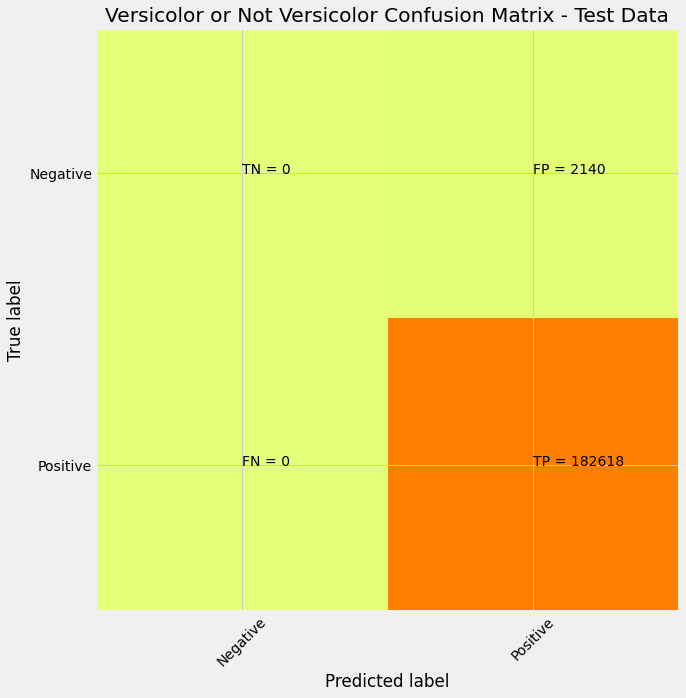

In [ ]:
plt.clf()
plt.figure(figsize=(20,10))
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['sc_status', 'prediction']
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84    182618
           1       0.00      0.00      0.00      2140
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00       232
           4       0.00      0.00      0.00     64080
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00      4318
           8       0.00      0.00      0.00         3
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00         1

    accuracy                           0.72    253498
   macro avg       0.07      0.09      0.08    253498
weighted avg       0.52      0.72      0.60    253498



### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, TrainValidationSplit

## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=1fbb34501fd156b41019eb09ce18bcd293201cd2f6992a24d347f640d466d58b
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
# you can also use PySpark package, if preferred
from apyori import apriori
import matplotlib.pyplot as plt

arm_df = weblog_df_sample 
arm_df

ARM_sample = arm_df.drop(columns=['cs_uri_stem','cs(User_Agent)'], axis=1)

ARM_sample

,date,time,s_sitename,s_ip,cs_method,s_port,c_ip,sc_status,sc_substatus,sc_win32_status
16508,2006-12-01,03:53:02,W3SVC1,127.0.0.1,GET,80,210.168.224.98,200,0,0
62067,2006-11-27,09:11:09,W3SVC1,127.0.0.1,GET,80,218.102.232.105,304,0,0
9145,2006-11-20,02:58:02,W3SVC1,127.0.0.1,GET,80,202.64.253.66,200,0,0
26383,2006-12-23,07:23:55,W3SVC1,127.0.0.1,GET,80,61.18.123.162,200,0,0
27342,2007-01-12,07:29:40,W3SVC1,127.0.0.1,GET,80,61.123.176.190,200,0,0
...,...,...,...,...,...,...,...,...,...,...
28392,2006-11-15,05:43:49,W3SVC1,127.0.0.1,GET,80,203.186.130.2,200,0,0
38623,2006-11-01,08:54:26,W3SVC1,127.0.0.1,GET,80,202.221.254.3,304,0,0
45950,2007-02-14,13:26:28,W3SVC1,127.0.0.1,GET,80,122.26.17.68,200,0,0
107488,2006-12-14,16:35:12,W3SVC1,127.0.0.1,GET,80,219.77.231.98,200,0,0


In [ ]:
obs = []
for i in range(len(ARM_sample)):
  obs.append([str(ARM_sample.values[i,j]) for j in range(0,10)])

Association_ARM = apriori(obs, min_lenth=2, min_support = 0.5, min_confidence=0.7, min_list=3)
Association_ARM = list(Association_ARM)

In [ ]:
Results = [list(x) for x in Association_ARM]
print(Results)

[[frozenset({'0'}), 0.9999138540133755, [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=0.9999138540133755, lift=1.0)]], [frozenset({'127.0.0.1'}), 0.9999984193396949, [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'127.0.0.1'}), confidence=0.9999984193396949, lift=1.0)]], [frozenset({'200'}), 0.7202681748273524, [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'200'}), confidence=0.7202681748273524, lift=1.0)]], [frozenset({'80'}), 0.9999984193396949, [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'80'}), confidence=0.9999984193396949, lift=1.0)]], [frozenset({'GET'}), 0.9980190374727138, [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'GET'}), confidence=0.9980190374727138, lift=1.0)]], [frozenset({'W3SVC1'}), 0.9999984193396949, [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'W3SVC1'}), confidence=0.9999984193396949, lift=1.0)]], [frozenset({'0', '127.0.0.1'}), 0.99991385401

In [ ]:
for i in range(len(Association_ARM)):
    print("##############################################################################")
    print(i)
    print(Association_ARM[i])
    print(Association_ARM[i].items)

##############################################################################
0
RelationRecord(items=frozenset({'0'}), support=0.9999138540133755, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=0.9999138540133755, lift=1.0)])
frozenset({'0'})
##############################################################################
1
RelationRecord(items=frozenset({'127.0.0.1'}), support=0.9999984193396949, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'127.0.0.1'}), confidence=0.9999984193396949, lift=1.0)])
frozenset({'127.0.0.1'})
##############################################################################
2
RelationRecord(items=frozenset({'200'}), support=0.7202681748273524, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'200'}), confidence=0.7202681748273524, lift=1.0)])
frozenset({'200'})
##############################################################################


In [ ]:
for i in range(5):
    print("##############################################################################")
    print(i)
    print(Association_ARM[i])
    print(Association_ARM[i].items)

##############################################################################
0
RelationRecord(items=frozenset({'0'}), support=0.9999138540133755, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=0.9999138540133755, lift=1.0)])
frozenset({'0'})
##############################################################################
1
RelationRecord(items=frozenset({'127.0.0.1'}), support=0.9999984193396949, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'127.0.0.1'}), confidence=0.9999984193396949, lift=1.0)])
frozenset({'127.0.0.1'})
##############################################################################
2
RelationRecord(items=frozenset({'200'}), support=0.7202681748273524, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'200'}), confidence=0.7202681748273524, lift=1.0)])
frozenset({'200'})
##############################################################################


# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
!pip install beautifulsoup4
!pip install lxml
!pip install requests

from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
from pandas import read_csv
import requests
import re

from urllib.request import urlopen

html = urlopen('https://scholar.google.com/citations?user=dqwjm-0AAAAJ')
Scholar_html = soup(html.read())

Citation_Year = [Citation_Year.text for Citation_Year in Scholar_html.find_all('span', {'class':'gsc_g_t'})]

print(Citation_Year)

Citation_Number = [Citation_Number.text for Citation_Number in Scholar_html.find_all('span',{'class':'gsc_g_al'})]

print(Citation_Number)

['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
['15', '34', '17', '11', '33', '41', '57', '68', '105', '131', '170', '251', '290', '340', '385', '452', '583', '842', '322']


The information of citations from Gang Li is located in a DataFrame in Pandas.

In [ ]:
TS= pd.DataFrame([Citation_Year,Citation_Number]).T
TS = TS.rename(columns={0: 'Year', 1: 'Citation_Number'})
TS = TS.astype({'Year':'datetime64[Y]', 'Citation_Number':'float32'}) 

TS.to_csv("/content/drive/MyDrive/SIT742/Citation2003-2021.csv", index=False, encoding='utf-8-sig')


## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

Charge the libraries neccesaries and also the style of the plots another styles are bmh', 'dark_background', 'ggplot', 'grayscale'

In [ ]:
!pip install "statsmodels==0.11.1"
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
plt.style.use('fivethirtyeight')

Given that 2021 is not over the information offered in this year is consider as outlier, we drop this row, Also here the index was set up

In [ ]:
TS =TS[:-1]
TS = TS.set_index('Year')

another library use charge is rcParams whichs stands for runtime cofiguration Paramaeters, help us with the size of the plot

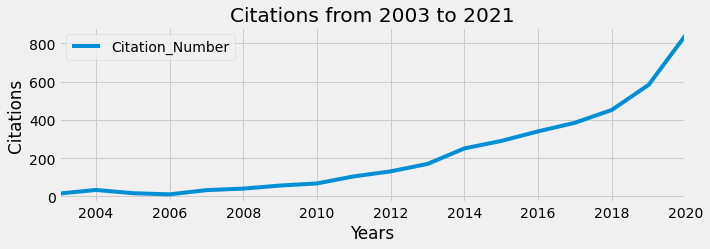

In [ ]:
from pylab import rcParams
TS.plot()
plt.title("Citations from 2003 to 2021")
plt.xlabel("Years")
plt.ylabel("Citations")
pyplot.show()
rcParams['figure.figsize'] = 10,3

In any analysis of  time series before starting it is necessary to understand what it is the trend the seasonality,for this it was use descomposition

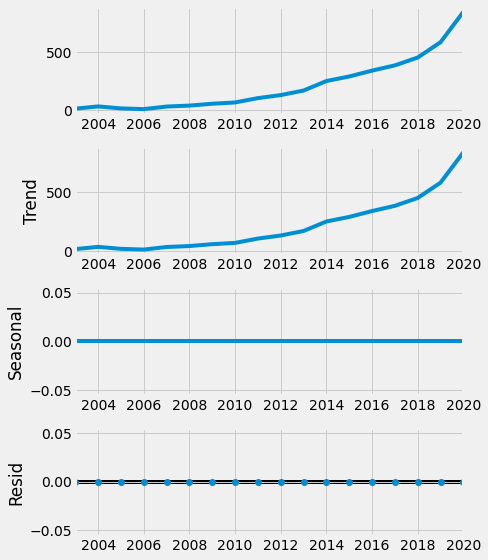

In [ ]:
import statsmodels.api as sm
rcParams['figure.figsize'] = 7, 8
decomposition = sm.tsa.seasonal_decompose(TS, model='additive')
fig = decomposition.plot()
plt.show()

augmented Dickey-Fuller(ADF) test

Therefore is necessary to run a test called augmented Dickey-Fuller, this is for testing stationarity, 
the null hypothesis of the test is that the time series is not stationary, if the series is really stationary you should get a p-value < 0.05 

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(TS.Citation_Number.values)
#No pass Dickey-Fuller
#adfuller(TSM.Citation_Number.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('lags used: %i' % result[2]) 
print('Number of observations used for the ADF: %i' % result[3]) 
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.377061
p-value: 0.997007
lags used: 7
Number of observations used for the ADF: 10
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


Given that our time serie is not stationary we need to transform, in this case, it was used the Log 

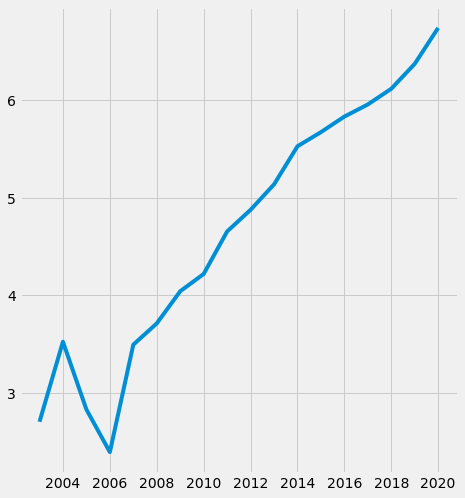

In [ ]:
TS_log = np.log(TS)
plt.plot(TS_log)
rcParams['figure.figsize'] = 5,4

Sometimes this process requires many iterations, therefore it was created it a formula call "get_stationarity" 

In [ ]:
def get_stationarity(timeseries):
  #rolling Statistics 
  rm = timeseries.rolling(window=2).mean()
  rm_std = timeseries.rolling(window=2).std()

  #rolling statistcs plot
  original = plt.plot(timeseries, color = 'blue' , label = 'original')
  plt.plot(rm, color ='red', label = 'Rolling Mean')
  plt.plot(rm_std, color ='yellow', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean and and Rolling Standard deviation')
  plt.show(block = False)

  #Dickey -Fuller Test
  result = adfuller(timeseries['Citation_Number'])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('lags used: %i' % result[2]) 
  print('Number of observations used for the ADF: %i' % result[3]) 
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

we must ensure that the time series is stationary, we can use the ADF and with rolling statistics, when you plot the rolling mean and the rolling standard deviation, the time series is stationary if they remain constant in time.

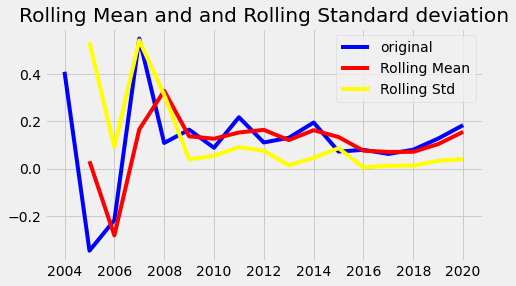

ADF Statistic: -4.996514
p-value: 0.000023
lags used: 0
Number of observations used for the ADF: 16
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674


In [ ]:
TS_mean =TS_log.rolling(window =2).mean()
TS_log_minus_mean = TS_log - TS_mean
TS_log_minus_mean.dropna(inplace=True)
rcParams['figure.figsize'] = 7,4

get_stationarity(TS_log_minus_mean)

The Auto-correlation function (ACF):
calculate the auto correlation of different lags at the same time.
The observation one has the largest correlation basically itself) next month is higly correlated meaning that the series is highly correlated with the month before. The lines outside of the blue area help us to understand what its the paramenter in a model MA, in this case it would be one

[]

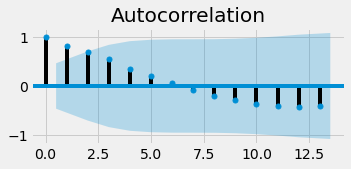

In [ ]:
from statsmodels.graphics import tsaplots
#ACF 
rcParams['figure.figsize'] = 5, 2
tsaplots.plot_acf(TS_log, zero=True)
plt.plot()

The PACF give us information about the partial correlation coefficients between the time series and lags of itself. 

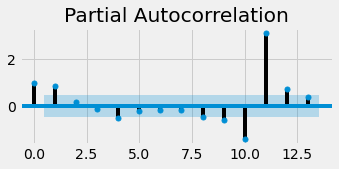

In [ ]:
#Pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(TS_log)
plt.show()

Now that our time series is stationary, we proceed with train and test the serie 

In [ ]:
size = len(TS_log) - 3
train, test = TS_log[0:size], TS_log[size:]

through the function ARIMA we train a model with parameters p=1, q=1, d=1,

In [ ]:
# fit an ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        Citation_Number   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -8.919
Date:                Sat, 22 May 2021   AIC                             23.838
Time:                        11:40:01   BIC                             25.755
Sample:                    01-01-2003   HQIC                            23.661
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6885      0.956     -0.720      0.471      -2.562       1.185
ma.L1          0.9975     39.135      0.025      0.980     -75.706      77.701
sigma2         0.1914      7.393      0.026      0.9

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In this part we load some libraries in order to handle plots, Dataframes, and the , mean squared error 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = TS_log.values
X = X.astype('float32')
size = len(X) - 3
train, test = X[0:size], X[size:]
history = [x for x in train]
year  = 2017
predictions = list()
confidence_interval = []

for t in range(len(test)):
  model = ARIMA(history, order=(1,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  uno = np.exp(yhat)
  obs = test[t]
  history.append(obs)
  year +=1
  dos = np.exp(obs)
  print('year=%i , predicted=%f , expected=%f ' % (year, uno, dos))



  #transform to the original data
test_normal = np.exp(test)
predictions_normal = np.exp(predictions)

# evaluate forecasts
rmse = sqrt(mean_squared_error(test_normal, predictions_normal))
print('Test RMSE ''transform serie'': %.3f' % rmse)

year=2018 , predicted=415.128512 , expected=452.000031 
year=2019 , predicted=438.410230 , expected=582.999817 
year=2020 , predicted=641.777234 , expected=842.000183 
Test RMSE transform serie: 144.170


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

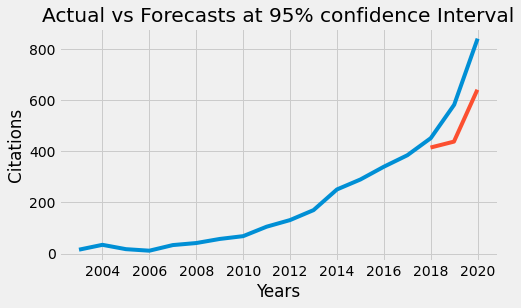

In [ ]:
der = pd.DataFrame({'yearpred':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan, predictions_normal[0],predictions_normal[1],predictions_normal[2]]} , index=pd.date_range(start='1/1/2003',end='1/1/2020',freq='365D'))
pyplot.plot(TS) 
pyplot.plot(der)
plt.title("Actual vs Forecasts at 95% confidence Interval")
plt.xlabel("Years")
plt.ylabel("Citations")
pyplot.show()
rcParams['figure.figsize'] = 7,4


## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets

 
X = TS.values
X = X.astype('float32')
size = len(X) - 3
train, test = X[0:size], X[size:]

history = [x for x in train]
predictions = list()
predictionsre = list()
realobs = list()

RSME = []
p= list(range(1,3))
q= list(range(1,3))
d= list(range(1,3))
Parameter =[]

# walk-forward validation
import warnings
warnings.filterwarnings ('ignore')

Best_RSME = np.inf
for i1 in p:
  for i2 in q:
    for i3 in d:
      for t in range(len(test)):
        try:
          model = ARIMA(history, order=(i1,i3,i2))
          model_fit = model.fit()
          output = model_fit.forecast()
          yhat = output[0]
          #yhat = np.exp(yhat)
          predictions.append(yhat)
          obs = test[t]
          history.append(obs)
          #dos = np.exp(obs)
          #realobs.append(dos)
          #print('predicted=%f, expected=%f' % (yhat, obs))  
          rmse = sqrt(mean_squared_error(test, predictions))
          Parameter.append([i1, i3, i2, rmse])
          history = [x for x in train]
          predictions = list()  
          #predictionsre = list()
          RSME.append(rmse)
          print('Test RMSE: %.3f - ARIMA: = %i,%i,%i' %(rmse, i1,i3,i2))
         #print('Test RMSE: %.3f' % rmse,i1,i3,i2)
          if rmse < Best_RSME:
            Best_RSME = rmse
            best_Model = model_fit
            print('*****Best******')
                      
        except:
          continue
Total =pd.DataFrame(Parameter, columns=['Order p', 'Order q', 'Order d','RMSE'])

Totalw=Total['Order p'].astype(str)+' '+Total['Order q'].astype(str)+' '+Total['Order d'].astype(str)
Totalr = pd.DataFrame(Totalw, columns=['ORDER'])
Totals = pd.DataFrame(Total['RMSE'],columns=['RMSE'])
Total = pd.concat([Totalr, Totals], axis=1) 
Total.to_csv("/content/drive/MyDrive/SIT742/search-results.csv", index=False)


Test RMSE: 103.228 - ARIMA: = 1,1,1
*****Best******
Test RMSE: 97.641 - ARIMA: = 1,2,1
*****Best******
Test RMSE: 103.703 - ARIMA: = 1,1,2
Test RMSE: 94.379 - ARIMA: = 1,2,2
*****Best******
Test RMSE: 92.950 - ARIMA: = 2,1,1
*****Best******
Test RMSE: 106.226 - ARIMA: = 2,2,1
Test RMSE: 102.636 - ARIMA: = 2,1,2
Test RMSE: 104.280 - ARIMA: = 2,2,2


In [ ]:
Total

,ORDER,RMSE
0,1 1 1,103.228218
1,1 2 1,97.640804
2,1 1 2,103.702932
3,1 2 2,94.379288
4,2 1 1,92.949608
5,2 2 1,106.225676
6,2 1 2,102.636291
7,2 2 2,104.279605


In [ ]:
train

array([[ 15.],
       [ 34.],
       [ 17.],
       [ 11.],
       [ 33.],
       [ 41.],
       [ 57.],
       [ 68.],
       [105.],
       [131.],
       [170.],
       [251.],
       [290.],
       [340.],
       [385.]], dtype=float32)

In [ ]:
test

array([[452.],
       [583.],
       [842.]], dtype=float32)

### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = TS_log.values
X = X.astype('float32')
size = len(X) - 3
train, test = X[0:size], X[size:]
history = [x for x in train]
year  = 2017
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(1,2,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  uno = np.exp(yhat)
  obs = test[t]
  history.append(obs)
  year +=1
  dos = np.exp(obs)
  print('year=%i,predicted=%f, expected=%f' % (year, uno, dos))

  #transform to the original data
test_normal = np.exp(test)
predictions_normal = np.exp(predictions)

# evaluate forecasts
rmse = sqrt(mean_squared_error(test_normal, predictions_normal))
print('Test RMSE ''transform serie'': %.3f' % rmse)


# plot forecasts against actual outcomes and also the confidence int at 95%
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.fill_between(list(range(len(test)))
                np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1],
                alpha=0.1, color='b')
pyplot.show()



SyntaxError: ignored

In [ ]:
# forecast
result = model_fit.get_forecast(steps=3)
predictions = result.predicted_mean
predictions = np.exp(predictions)
predictions

<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
